# MNIST GAN 0.3a

Experimenting with one-sided label smoothing to see if this improves GAN performance/convergence.

In [1]:
from google.colab import files

import mnist_example as mnist_ex
import gan
from importlib import reload
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.keras.backend import clear_session

import pickle

In [2]:
mnist_ex.preprocess_real(save_only=True)
real_train, real_test = pickle.load(open("mnist_train_tuple.p", "rb"))
real_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 32, 32, 1)

In [4]:
reload(gan)

<module 'gan' from '/content/gan.py'>

In [5]:
clear_session()
model = gan.GAN(x_shape=real_train.shape[1:], kernal_size=5, 
                latent_dims=50, verbose=True)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               26112     
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048      
_________________________________________________________________
reshape (Reshape)            (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 64)          204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 4, 4, 64)          256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 4, 4, 64)          0 

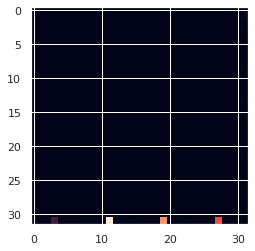

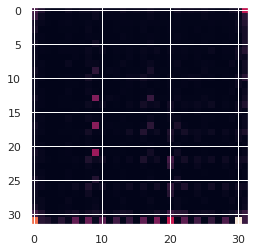

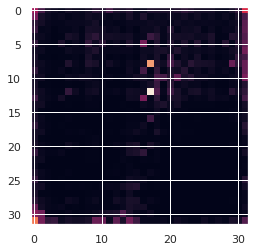

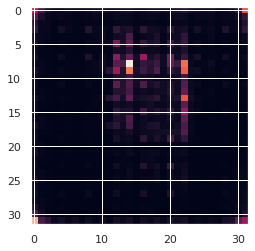

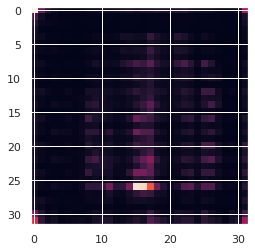

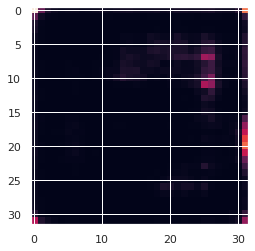

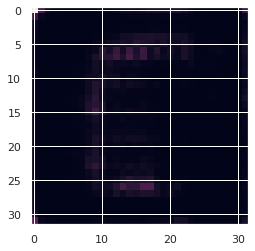

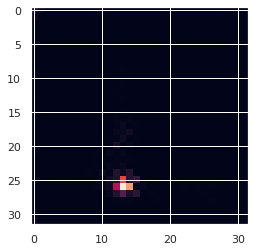

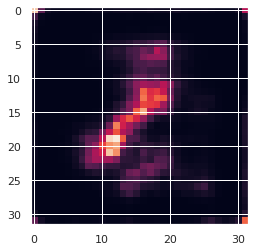

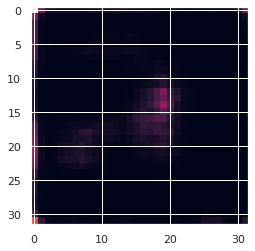

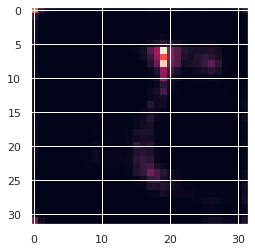

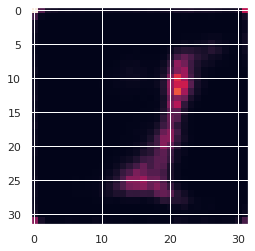

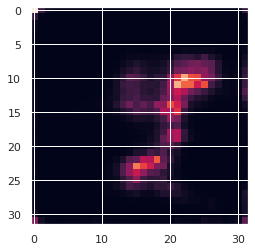

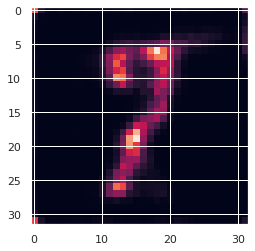

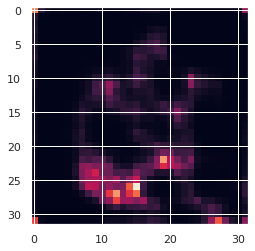

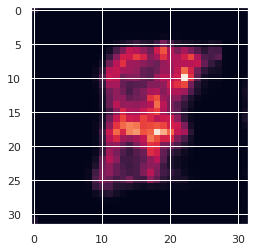

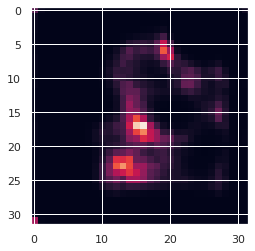

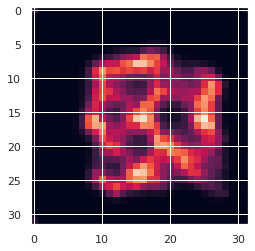

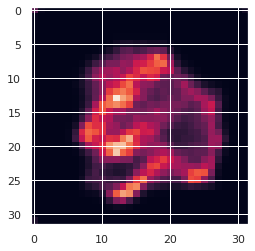

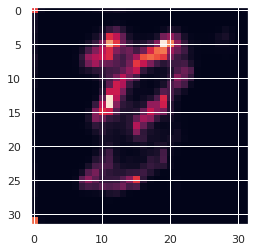

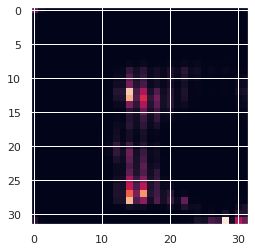

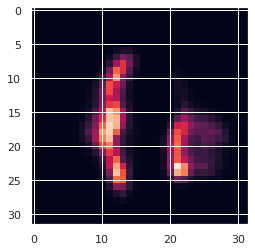

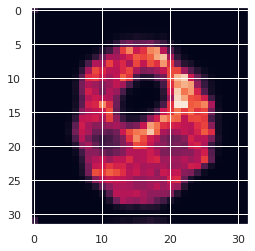

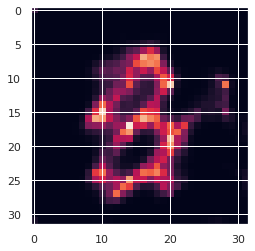

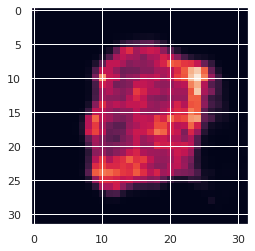

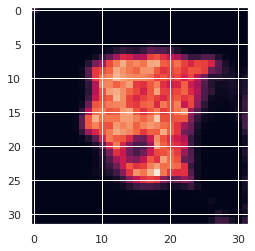

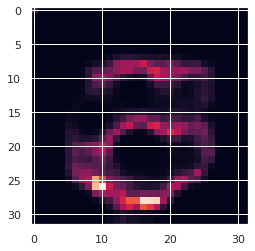

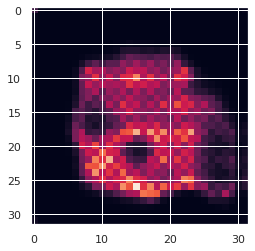

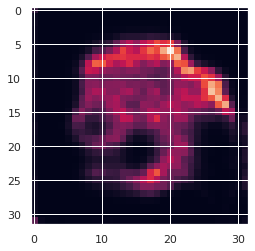

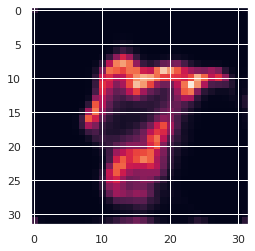

In [6]:
# Positive label smoothed
model.train(real_train, num_epochs=30, batch_size=30, labels=(0, 0.9))

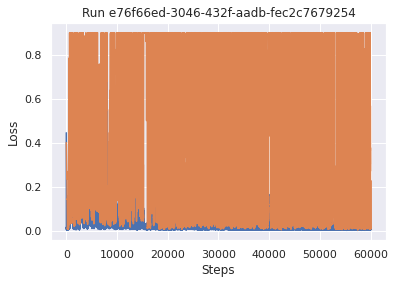

In [7]:
model.history.plot_loss()

In [8]:
print(model.history.run_id)

e76f66ed-3046-432f-aadb-fec2c7679254


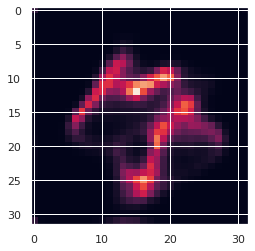

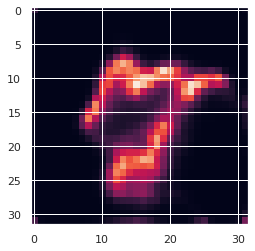

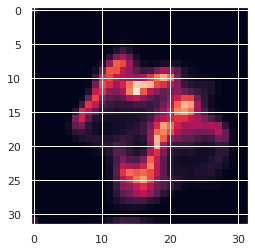

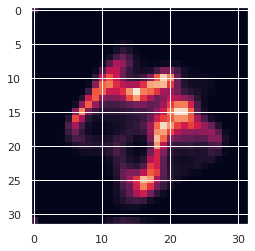

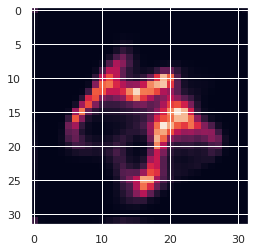

In [17]:
for _ in range(5):
  fake_img = model.generator.predict(np.random.randn(1, 50))
  plt.imshow(fake_img.reshape(32, 32))
  plt.show()

From the above, we can see that the model has collapsed to a single output ('curly 7' above).

We now need to consciously look for techniques to discourage this collapse.

Note also that there are far fewer 'blank' images generated in this run as compared to previous runs.

We can also see that the discriminator's performance is significantly improved (more stable) as compared to previous runs.

*Decision:* ACCEPT one sided label smoothing.

In [19]:
!zip -r /content/temp_file.zip /content/Training_Runs
files.download("/content/temp_file.zip")

  adding: content/Training_Runs/ (stored 0%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/ (stored 0%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch5.png (deflated 11%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch4.png (deflated 11%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch30.png (deflated 13%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch13.png (deflated 13%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch8.png (deflated 19%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch26.png (deflated 13%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch6.png (deflated 13%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoch12.png (deflated 13%)
  adding: content/Training_Runs/e76f66ed-3046-432f-aadb-fec2c7679254/img_epoc

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
!rm temp_file.zip